<center><h1>DSCI552_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get the Vertebral Column Data Set

I tried using both the dataset by concatenating them however the results are better with column_2C dataset.

In [38]:
# df1 = pd.read_csv("data/vertebral_column_data/column_2C.dat", delim_whitespace=True, header=None)
# #print(df1)
# df2 = pd.read_csv("data/vertebral_column_data/column_3C.dat", delim_whitespace=True, header=None)
#print(df2)
# Combine the two DataFrames into one
Vertebral_df= pd.read_csv("../data/vertebral_column_data/column_2C.dat",sep='\\s+', header=None)
#Vertebral_df = pd.concat([df1, df2], ignore_index=True)
print("Shape of combined_df:", Vertebral_df.shape)

Shape of combined_df: (310, 7)


In [39]:
Vertebral_df.columns = [
    "PI", 
    "PT", 
    "LLA", 
    "SS", 
    "PR", 
    "GoS", 
    "Class"
]

print(Vertebral_df)

        PI     PT    LLA     SS      PR    GoS Class
0    63.03  22.55  39.61  40.48   98.67  -0.25    AB
1    39.06  10.06  25.02  29.00  114.41   4.56    AB
2    68.83  22.22  50.09  46.61  105.99  -3.53    AB
3    69.30  24.65  44.31  44.64  101.87  11.21    AB
4    49.71   9.65  28.32  40.06  108.17   7.92    AB
..     ...    ...    ...    ...     ...    ...   ...
305  47.90  13.62  36.00  34.29  117.45  -4.25    NO
306  53.94  20.72  29.22  33.22  114.37  -0.42    NO
307  61.45  22.69  46.17  38.75  125.67  -2.71    NO
308  45.25   8.69  41.58  36.56  118.55   0.21    NO
309  33.84   5.07  36.64  28.77  123.95  -0.20    NO

[310 rows x 7 columns]


### For Binary Classification Only Selecting 'NO' and 'AB'

In [40]:
Vertebral_df=Vertebral_df[Vertebral_df['Class'].isin(['NO', 'AB'])]
Vertebral_df['class'] = Vertebral_df['Class'].replace({'NO': 0, 'AB': 1})
Vertebral_df = Vertebral_df.drop(columns=['Class'])
print(Vertebral_df)

        PI     PT    LLA     SS      PR    GoS  class
0    63.03  22.55  39.61  40.48   98.67  -0.25      1
1    39.06  10.06  25.02  29.00  114.41   4.56      1
2    68.83  22.22  50.09  46.61  105.99  -3.53      1
3    69.30  24.65  44.31  44.64  101.87  11.21      1
4    49.71   9.65  28.32  40.06  108.17   7.92      1
..     ...    ...    ...    ...     ...    ...    ...
305  47.90  13.62  36.00  34.29  117.45  -4.25      0
306  53.94  20.72  29.22  33.22  114.37  -0.42      0
307  61.45  22.69  46.17  38.75  125.67  -2.71      0
308  45.25   8.69  41.58  36.56  118.55   0.21      0
309  33.84   5.07  36.64  28.77  123.95  -0.20      0

[310 rows x 7 columns]


C:\Users\Hritika\AppData\Local\Temp\ipykernel_20396\1484255561.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Vertebral_df['class'] = Vertebral_df['Class'].replace({'NO': 0, 'AB': 1})


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [41]:
###!pip install Seaborn

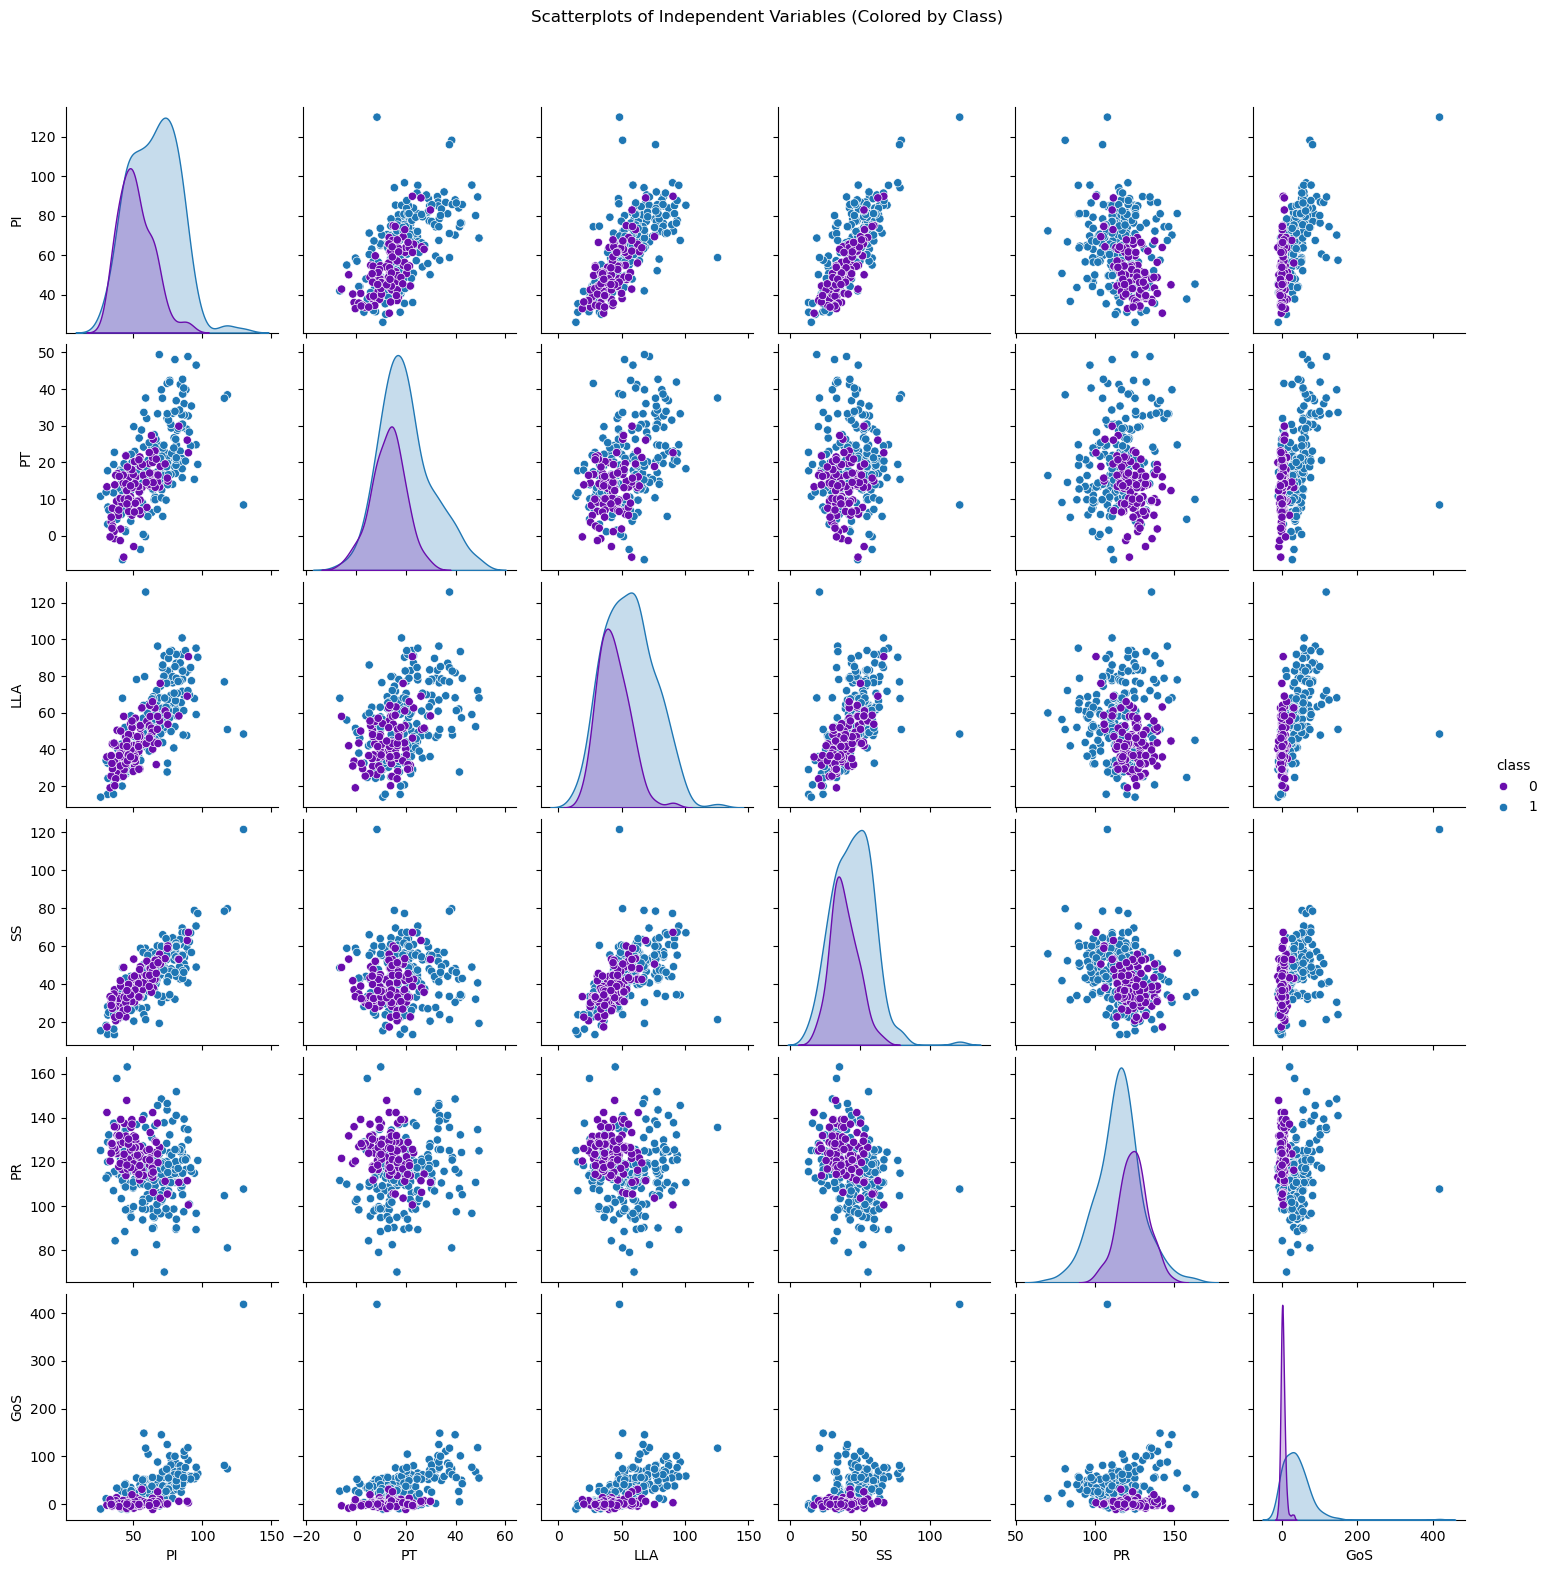

In [42]:
# ### scatterplots of the independent variables in the dataset
import seaborn as sns
# sns.pairplot(Vertebral_df, hue="class", vars=['PI','PT','LLA','SS','PR','GoS'],palette="mako")
# plt.show()
##Creating two different colors for 0 and 1
palette = {0: "#6a0dad", 1: "#1f77b4"} ## for 0-> Purple for 1-> Teal
sns.pairplot(Vertebral_df, hue='class', palette=palette)
plt.suptitle("Scatterplots of Independent Variables (Colored by Class)", y=1.05)
plt.show()

#### ii. Boxplots

Text(0.5, 1.0, 'Boxplot of Pelvic Incidence by Class')

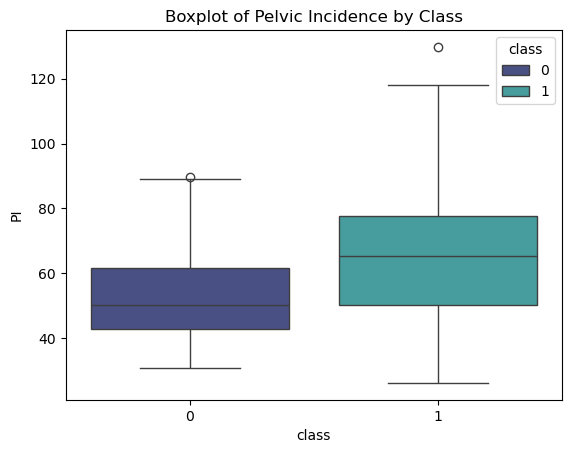

In [43]:
###  boxplots for each of the independent variables
sns.boxplot(Vertebral_df, hue="class",x='class', y='PI',palette="mako")
plt.title("Boxplot of Pelvic Incidence by Class")


Text(0.5, 1.0, 'Boxplot of Pelvic Tilt by Class')

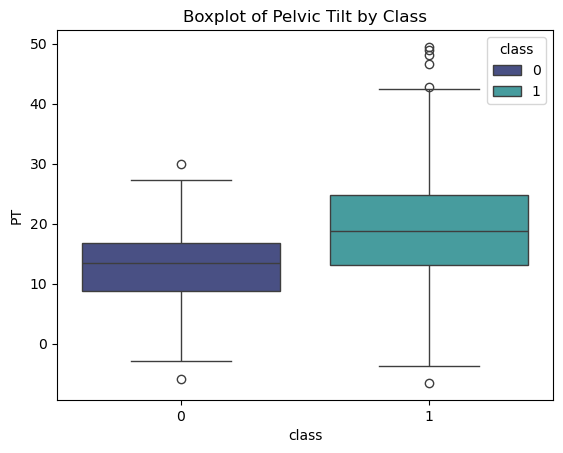

In [44]:
sns.boxplot(Vertebral_df, hue="class",x='class', y='PT',palette="mako")
plt.title("Boxplot of Pelvic Tilt by Class")

Text(0.5, 1.0, 'Boxplot of Lumbar Lordosis Angle by Class')

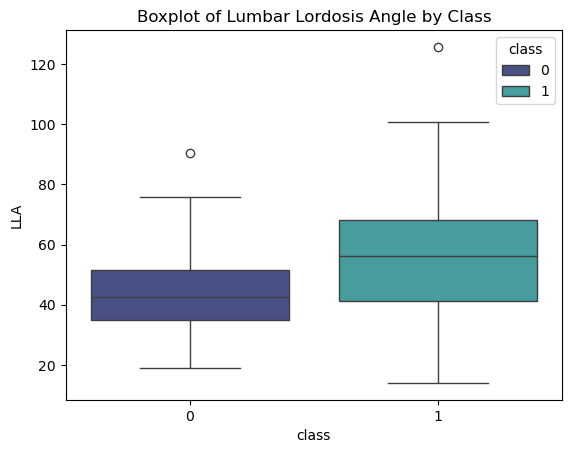

In [45]:
sns.boxplot(Vertebral_df, hue="class",x='class', y='LLA',palette="mako")
plt.title("Boxplot of Lumbar Lordosis Angle by Class")

Text(0.5, 1.0, 'Boxplot of Sacral Slope by Class')

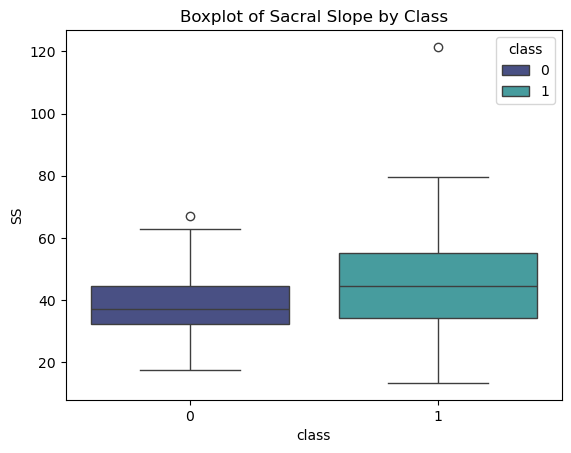

In [46]:
sns.boxplot(Vertebral_df, hue="class",x='class', y='SS',palette="mako")
plt.title("Boxplot of Sacral Slope by Class")

Text(0.5, 1.0, 'Boxplot of Pelvic Radius by Class')

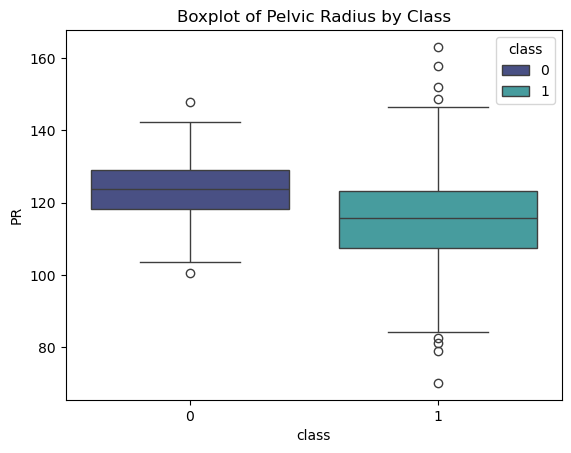

In [47]:
sns.boxplot(Vertebral_df, hue="class",x='class', y='PR',palette="mako")
plt.title("Boxplot of Pelvic Radius by Class")

Text(0.5, 1.0, 'Boxplot of Grade of Spondylolisthesis by Class')

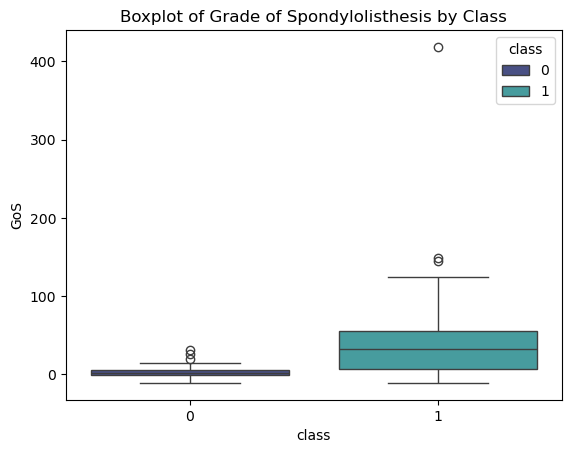

In [48]:
sns.boxplot(Vertebral_df, hue="class",x='class', y='GoS',palette="mako")
plt.title("Boxplot of Grade of Spondylolisthesis by Class")

#### iii. Split Data Set

Selecting the first 70 rows of Class 0

In [49]:
class_0 = Vertebral_df[Vertebral_df['class'] == 0]
training_class_0 = class_0.head(70)

Selecting the first 140 rows of Class 1

In [50]:
class_1 = Vertebral_df[Vertebral_df['class'] == 1]
training_class_1 = class_1.head(140)

Concatenating them to create the training set

In [51]:

training_set = pd.concat([training_class_0, training_class_1])
training_set=training_set.sample(frac=1, random_state=7).reset_index(drop=True)
training_set.head()

,PI,PT,LLA,SS,PR,GoS,class
0,43.79,13.53,42.69,30.26,125.00,13.29,1
1,67.29,16.72,51.00,50.57,137.59,4.96,0
2,36.13,22.76,29.00,13.37,115.58,-3.24,1
3,43.12,13.82,40.35,29.30,128.52,0.97,0
4,35.88,1.11,43.46,34.77,126.92,-1.63,0


In [52]:
### Test Set
num_of_0 = len(class_0) - 70
num_of_1 = len(class_1) - 140

In [53]:
testing_class_0 = class_0.tail(num_of_0)
testing_class_1 = class_1.tail(num_of_1)

testing_set = pd.concat([testing_class_0, testing_class_1])
testing_set=testing_set.sample(frac=1, random_state=22).reset_index(drop=True)
testing_set.head()

,PI,PT,LLA,SS,PR,GoS,class
0,53.68,13.45,41.58,40.24,113.91,2.74,0
1,64.27,12.51,68.70,51.77,95.25,39.41,1
2,74.47,33.28,66.94,41.19,146.47,124.98,1
3,89.50,48.90,72.00,40.60,134.63,118.35,1
4,55.08,-3.76,56.00,58.84,109.92,31.77,1


In [54]:
#print(f"Training set shape: {training_set.shape}")
#print(f"Test set shape: {testing_set.shape}")

In [55]:
x_train=training_set.drop(columns='class')
Y_train=training_set['class']
x_test=testing_set.drop(columns='class')
Y_test=testing_set['class']

### (c) Classification

#### i. Euclidean Metric

As our dataset uses various units it is best to normalize it for KNN

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


normalize_Scaler = MinMaxScaler()
norm_x_train = normalize_Scaler.fit_transform(x_train)
norm_x_test = normalize_Scaler.transform(x_test)

Tried both ways Normalizing Dataset and keep the data as it is, however accuracy without normalizing is better and the best_k value is exactly the sameI still prefered normalizing 

#### ii. Test Data

for the k range, I would rather choose only odd values rather than even values for binary classification
luckily our best_k is an odd number 

In [57]:
k_range =  list(range(208,0, -1))
all_scores = []
best_accuracy = 0
best_k = 0
error_rates = []
train_error=[]
for k in k_range:
    KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    KNeighbors_Classifier.fit(norm_x_train, Y_train)
    Y_pred = KNeighbors_Classifier.predict(norm_x_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    error_rates.append(1-accuracy)
    Y_train_pred = KNeighbors_Classifier.predict(norm_x_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_error.append(1 - train_accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
    
print("===== Best K-Value Selection (Euclidean Distance)===========")
print(f"Best k: {best_k} (Optimal number of neighbors)")
print(f"Best Accuracy: {best_accuracy:.4f} ")
print(f"Best Error Rate: {1-best_accuracy:.4f}")
print("=============================================================")


===== Best K-Value Selection (Euclidean Distance)===========
Best k: 3 (Optimal number of neighbors)
Best Accuracy: 0.8400 
Best Error Rate: 0.1600


Ploting the Training and Testing Error against k values

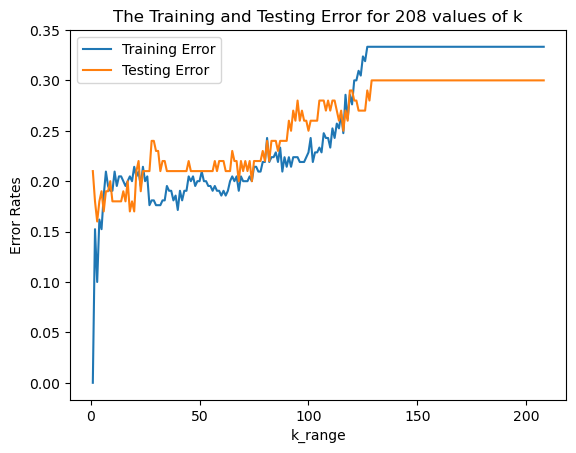

In [58]:
plt.title("The Training and Testing Error for 208 values of k")
plt.plot(k_range, train_error, label="Training Error")
plt.plot(k_range, error_rates, label="Testing Error")
plt.xlabel("k_range")
plt.ylabel("Error Rates")
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=2, metric='euclidean')
KNeighbors_Classifier.fit(x_train, Y_train)
Y_pred = KNeighbors_Classifier.predict(x_test)
Confusion_Matrix = confusion_matrix(Y_test, Y_pred)
print(Confusion_Matrix)

[[25  5]
 [ 5 65]]


In [60]:
TPR = Confusion_Matrix[1][1] / (Confusion_Matrix[1][1] + Confusion_Matrix[1][0])
TNR = Confusion_Matrix[0][0] / (Confusion_Matrix[0][0] + Confusion_Matrix[0][1])
print(f"True Positive Rate (TPR): {TPR}")
print(f"True Negative Rate (TNR): {TNR}")

True Positive Rate (TPR): 0.9285714285714286
True Negative Rate (TNR): 0.8333333333333334


In [61]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")

Precision: 0.9285714285714286
F1-Score: 0.9285714285714286


#### iii. Learning Curve

In [62]:
import math
best_error_rates = []
best_train_error_rates=[]
for N in range(10,211,10):
    N_for0=math.floor(N / 3)
    N_for1=N-N_for0

    class_0 = training_set[training_set['class'] == 0]
    training_class_0 = class_0.head(N_for0)
    class_1 = training_set[training_set['class'] == 1]
    training_class_1 = class_1.head(N_for1)
    Train_subset=pd.concat([training_class_0, training_class_1])

    new_x_train=Train_subset.drop(columns='class')
    new_Y_train=Train_subset['class']
    best_error= 12345678901234567890
    best_train_error= 12345678901234567890
    for k in range(1,N,5):
        KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        KNeighbors_Classifier.fit(new_x_train, new_Y_train)
        Y_pred = KNeighbors_Classifier.predict(x_test)
        error= 1-accuracy_score(Y_test, Y_pred)
        if error < best_error:
            best_error = error
            best_k = k
            
        Y_train_pred = KNeighbors_Classifier.predict(x_train)
        train_accuracy = accuracy_score(Y_train, Y_train_pred)
        train_error = 1 - train_accuracy
        if train_error<best_train_error:
            best_train_error=train_error
    best_error_rates.append(best_error)
    best_train_error_rates.append(best_train_error)




Didn't know how would I plot the learning rate so got the idea of best_error_rates list and graph  from GPT.

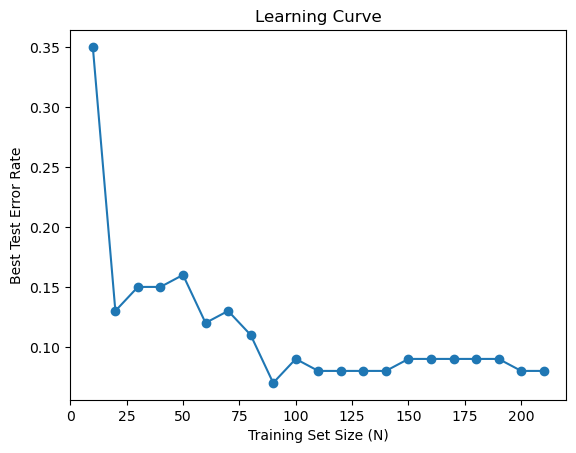

In [63]:
### Testing Error Rates VS size of Data
plt.plot(range(10, 211, 10), best_error_rates, marker='o', linestyle='-')
plt.xlabel("Training Set Size (N)")
plt.ylabel("Best Test Error Rate")
plt.title("Learning Curve")
plt.show()
    


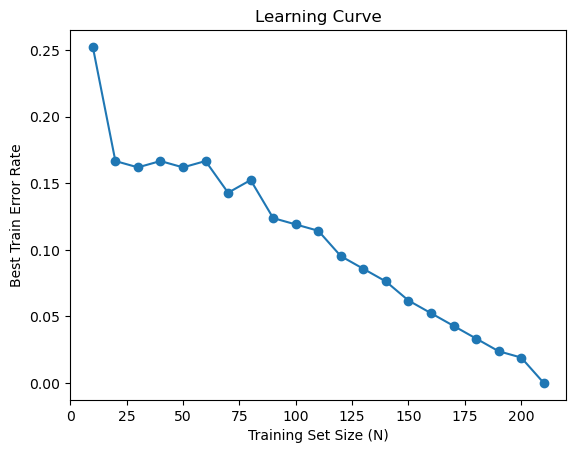

In [64]:
### Training Error Rates VS size of Data
plt.plot(range(10, 211, 10), best_train_error_rates, marker='o', linestyle='-')
plt.xlabel("Training Set Size (N)")
plt.ylabel("Best Train Error Rate")
plt.title("Learning Curve")
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [65]:
k_range=list(range(196,0,-5))
best_k_Qda=0
best_accuracy_Qda=0
best_train_error= 12345678901234567890
for k in k_range:
    KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=k,p=1)
    KNeighbors_Classifier.fit(norm_x_train, Y_train)
    Y_pred = KNeighbors_Classifier.predict(norm_x_test)
    accuracy_Qda = accuracy_score(Y_test, Y_pred)
    if accuracy_Qda > best_accuracy_Qda:
        best_accuracy_Qda = accuracy_Qda
        best_k_Qda = k
    Y_train_pred = KNeighbors_Classifier.predict(norm_x_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_error = 1 - train_accuracy
    if train_error<best_train_error:
        best_train_error=train_error
        k_for_best_train_error=k


print("===== Best K-Value Selection (Minkowski Distance)===========")
print(f"Best k: {best_k_Qda} (Optimal number of neighbors)")
print(f"Best Accuracy: {best_accuracy_Qda:.4f} ")
print(f"Best Error Rate: {1-best_accuracy_Qda:.4f}")
print(f"Best Train Error Rate: {best_train_error:.4f} for k:{k_for_best_train_error}")
print("=============================================================")

===== Best K-Value Selection (Minkowski Distance)===========
Best k: 6 (Optimal number of neighbors)
Best Accuracy: 0.8400 
Best Error Rate: 0.1600
Best Train Error Rate: 0.0000 for k:1


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [66]:
p_range = [pow(10, i) for i in np.arange(0.1, 1.1, 0.1)]
best_p=0
best_accuracy_Qdb=0
best_train_error= 12345678901234567890
for p in p_range:
    KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=p)
    KNeighbors_Classifier.fit(norm_x_train, Y_train)
    Y_pred = KNeighbors_Classifier.predict(norm_x_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    if accuracy > best_accuracy_Qdb:
        best_accuracy_Qdb = accuracy
        best_p = p
    Y_train_pred = KNeighbors_Classifier.predict(norm_x_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_error = 1 - train_accuracy
    if train_error<best_train_error:
        best_train_error=train_error
        k_for_best_train_error=k


print("===== Best K-Value Selection (Minkowski Distance)===========")
print(f"Best p: {best_p} (Optimal number of neighbors)")
print(f"Best Accuracy: {best_accuracy_Qdb:.4f} ")
print(f"Best Error Rate: {1-best_accuracy_Qdb:.4f}")
print(f"Best Train Error Rate: {best_train_error:.4f} for k:{k_for_best_train_error}")
print("=============================================================")

===== Best K-Value Selection (Minkowski Distance)===========
Best p: 1.2589254117941673 (Optimal number of neighbors)
Best Accuracy: 0.8300 
Best Error Rate: 0.1700
Best Train Error Rate: 0.1619 for k:1


##### C. Chebyshev Distance With p -> infinity.

In [67]:
k_range=list(range(1,197,5))
best_k_Qdc=0
best_accuracy_Qdc=0
best_train_error= 12345678901234567890
for k in k_range:
    KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1e6)
    KNeighbors_Classifier.fit(norm_x_train, Y_train)
    Y_pred = KNeighbors_Classifier.predict(norm_x_test)
    accuracy_Qdc = accuracy_score(Y_test, Y_pred)
    if accuracy_Qdc > best_accuracy_Qdc:
        best_accuracy_Qdc = accuracy_Qdc
        best_k_Qdc = k
    Y_train_pred = KNeighbors_Classifier.predict(norm_x_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_error = 1 - train_accuracy
    if train_error<best_train_error:
        best_train_error=train_error
        k_for_best_train_error=k    


print("===== Best K-Value Selection (Minkowski Distance) p->inf =====")
print(f"Best k: {best_k_Qdc} (Optimal number of neighbors)")
print(f"Best Accuracy: {best_accuracy_Qdc:.4f} ")
print(f"Best Error Rate: {1-best_accuracy_Qdc:.4f}")
print(f"Best Train Error Rate: {best_train_error:.4f} for k:{k_for_best_train_error}")
print("=============================================================")

===== Best K-Value Selection (Minkowski Distance) p->inf =====
Best k: 6 (Optimal number of neighbors)
Best Accuracy: 0.7000 
Best Error Rate: 0.3000
Best Train Error Rate: 0.3333 for k:1


#### ii. Mahalanobis Distance.

In [68]:
from scipy.spatial.distance import mahalanobis
k_range=list(range(1,197,5))
best_k_Qdii=0
best_accuracy_Qdii=0
matrix = np.cov(norm_x_train.T)
inv_matrix = np.linalg.inv(matrix)
best_train_error= 12345678901234567890
for k in k_range:
    KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=k,metric='mahalanobis', metric_params={'VI': inv_matrix})
    KNeighbors_Classifier.fit(norm_x_train, Y_train)
    Y_pred = KNeighbors_Classifier.predict(norm_x_test)
    accuracy_Qdii = accuracy_score(Y_test, Y_pred)
    if accuracy_Qdii > best_accuracy_Qdii:
        best_accuracy_Qdii = accuracy_Qdii
        best_k_Qdii = k
    Y_train_pred = KNeighbors_Classifier.predict(norm_x_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_error = 1 - train_accuracy
    if train_error<best_train_error:
        best_train_error=train_error
        k_for_best_train_error=k  



print("===== Best K-Value Selection (Mahalanobis Distance) =====")
print(f"Best k: {best_k_Qdii} (Optimal number of neighbors)")
print(f"Best Accuracy: {best_accuracy_Qdii:.4f} ")
print(f"Best Error Rate: {1-best_accuracy_Qdii:.4f}")
print(f"Best Train Error Rate: {best_train_error:.4f} for k:{k_for_best_train_error}")
print("=========================================================")

===== Best K-Value Selection (Mahalanobis Distance) =====
Best k: 1 (Optimal number of neighbors)
Best Accuracy: 0.8300 
Best Error Rate: 0.1700
Best Train Error Rate: 0.0000 for k:1


### (e) Weighted Decision

In [69]:
all_metrics = ['euclidean', 'manhattan', 'chebyshev']
Results_for_all_metrics = {}
k_range=list(range(1,197,5))
for i in all_metrics:
    best_k_Qe=0
    best_accuracy_Qe=0
    for k in k_range:
        KNeighbors_Classifier=KNeighborsClassifier(n_neighbors=k,metric=i,weights='distance')
        KNeighbors_Classifier.fit(norm_x_train, Y_train)
        Y_pred = KNeighbors_Classifier.predict(norm_x_test)
        accuracy_Qe = accuracy_score(Y_test, Y_pred)
        if accuracy_Qe > best_accuracy_Qe:
            best_accuracy_Qe = accuracy_Qe
            best_k_Qe = k
    Y_train_pred = KNeighbors_Classifier.predict(norm_x_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_error = 1 - train_accuracy
    if train_error<best_train_error:
        best_train_error=train_error
        k_for_best_train_error=k         
    Results_for_all_metrics[i] = {'best_k': best_k_Qe, 'best_accuracy': best_accuracy_Qe,'best_train_error':best_train_error,'k_for_train_error':k_for_best_train_error}



for i, result in Results_for_all_metrics.items():
    print(f"=============== Best Test Error Rates Metric: {i}======================")
    print(f"Best k: {result['best_k']}")
    print(f"Best Accuracy: {result['best_accuracy']}")
    print(f"Best Train Error Rate: {result['best_train_error']:.4f} for k:{result['k_for_train_error']}")
    print(f"Best Error Rate: {1- result['best_accuracy']:.4f}")

=============== Best Test Error Rates Metric: euclidean======================
Best k: 6
Best Accuracy: 0.82
Best Train Error Rate: 0.0000 for k:1
Best Error Rate: 0.1800
=============== Best Test Error Rates Metric: manhattan======================
Best k: 6
Best Accuracy: 0.84
Best Train Error Rate: 0.0000 for k:1
Best Error Rate: 0.1600
=============== Best Test Error Rates Metric: chebyshev======================
Best k: 11
Best Accuracy: 0.81
Best Train Error Rate: 0.0000 for k:1
Best Error Rate: 0.1900


### (f) Training Error Rate

The lowest training error rate I achieved in this homework is 0.0, which occurred when the training set size was 200 or 210(learning curve section). This indicates that the model achieved perfect classification on the training data for these larger training set sizes. As the model had more data to learn from, it was able to perfectly predict the training examples, leading to a training error of 0.0.... which also occurs when k=1.This is because, in the KNN algorithm, when k=1, each training sample is classified based on its closest neighbor, which is itself. As a result, there are no misclassifications on the training set, leading to a training error rate of 0.